<a href="https://colab.research.google.com/github/shashvat3107/Stroke-Prediction/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

In [7]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
df['bmi']

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [11]:
df['bmi'] = df['bmi'].replace(np.nan , df['bmi'].dropna().mean())

In [12]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

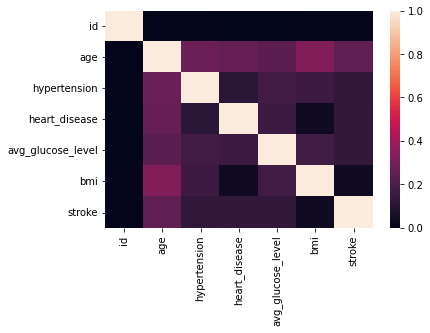

In [13]:
sns.heatmap(df.corr())

In [14]:
df1 =  pd.get_dummies(df,drop_first= True)

In [15]:
df1

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.893237,0,0,0,1,0,1,0,0,1,0,1,0
5106,44873,81.0,0,0,125.20,40.000000,0,0,0,1,0,0,1,0,1,0,1,0
5107,19723,35.0,0,0,82.99,30.600000,0,0,0,1,0,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.600000,0,1,0,1,0,1,0,0,0,1,0,0


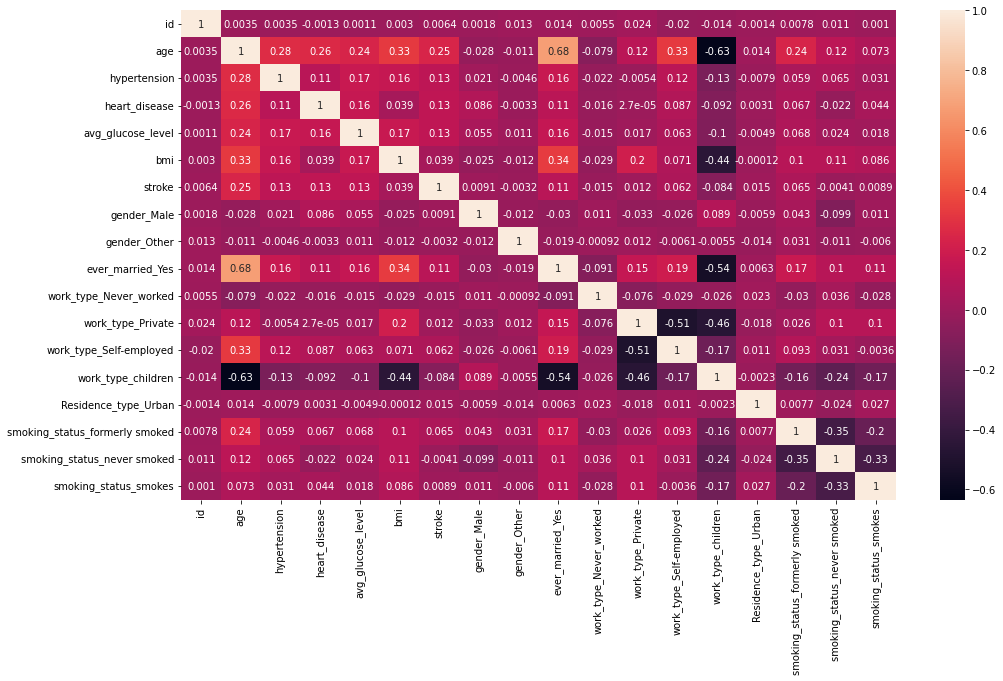

In [16]:
plt.figure(figsize = (16,9))
sns.heatmap(df1.corr(),annot = True)
plt.show()

In [17]:
a,b=0,0
for i in range(1,len(df['stroke'])):
    if df['stroke'][i] == 1:
        a = a+1
    else:
        b = b+1
print(a,b)

248 4861


In [18]:
df1.drop('id',axis = 1,inplace = True)
df1

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,0,0,1,0,1,0,0,1,0,1,0
5106,81.0,0,0,125.20,40.000000,0,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.99,30.600000,0,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.600000,0,1,0,1,0,1,0,0,0,1,0,0


In [19]:
df1.shape

(5110, 17)

# **Checking feature importances**

In [20]:
x= df1.drop("stroke" ,axis=1)
y = df1["stroke"]

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [22]:
print(model.feature_importances_)

[2.63130869e-01 2.40693907e-02 2.19661412e-02 2.57605151e-01
 2.27315938e-01 3.75288320e-02 2.71296852e-07 1.96629202e-02
 4.17054229e-05 2.40939574e-02 1.75423645e-02 1.40539143e-03
 4.30905740e-02 2.00019993e-02 2.26925368e-02 1.98519579e-02]


<BarContainer object of 16 artists>

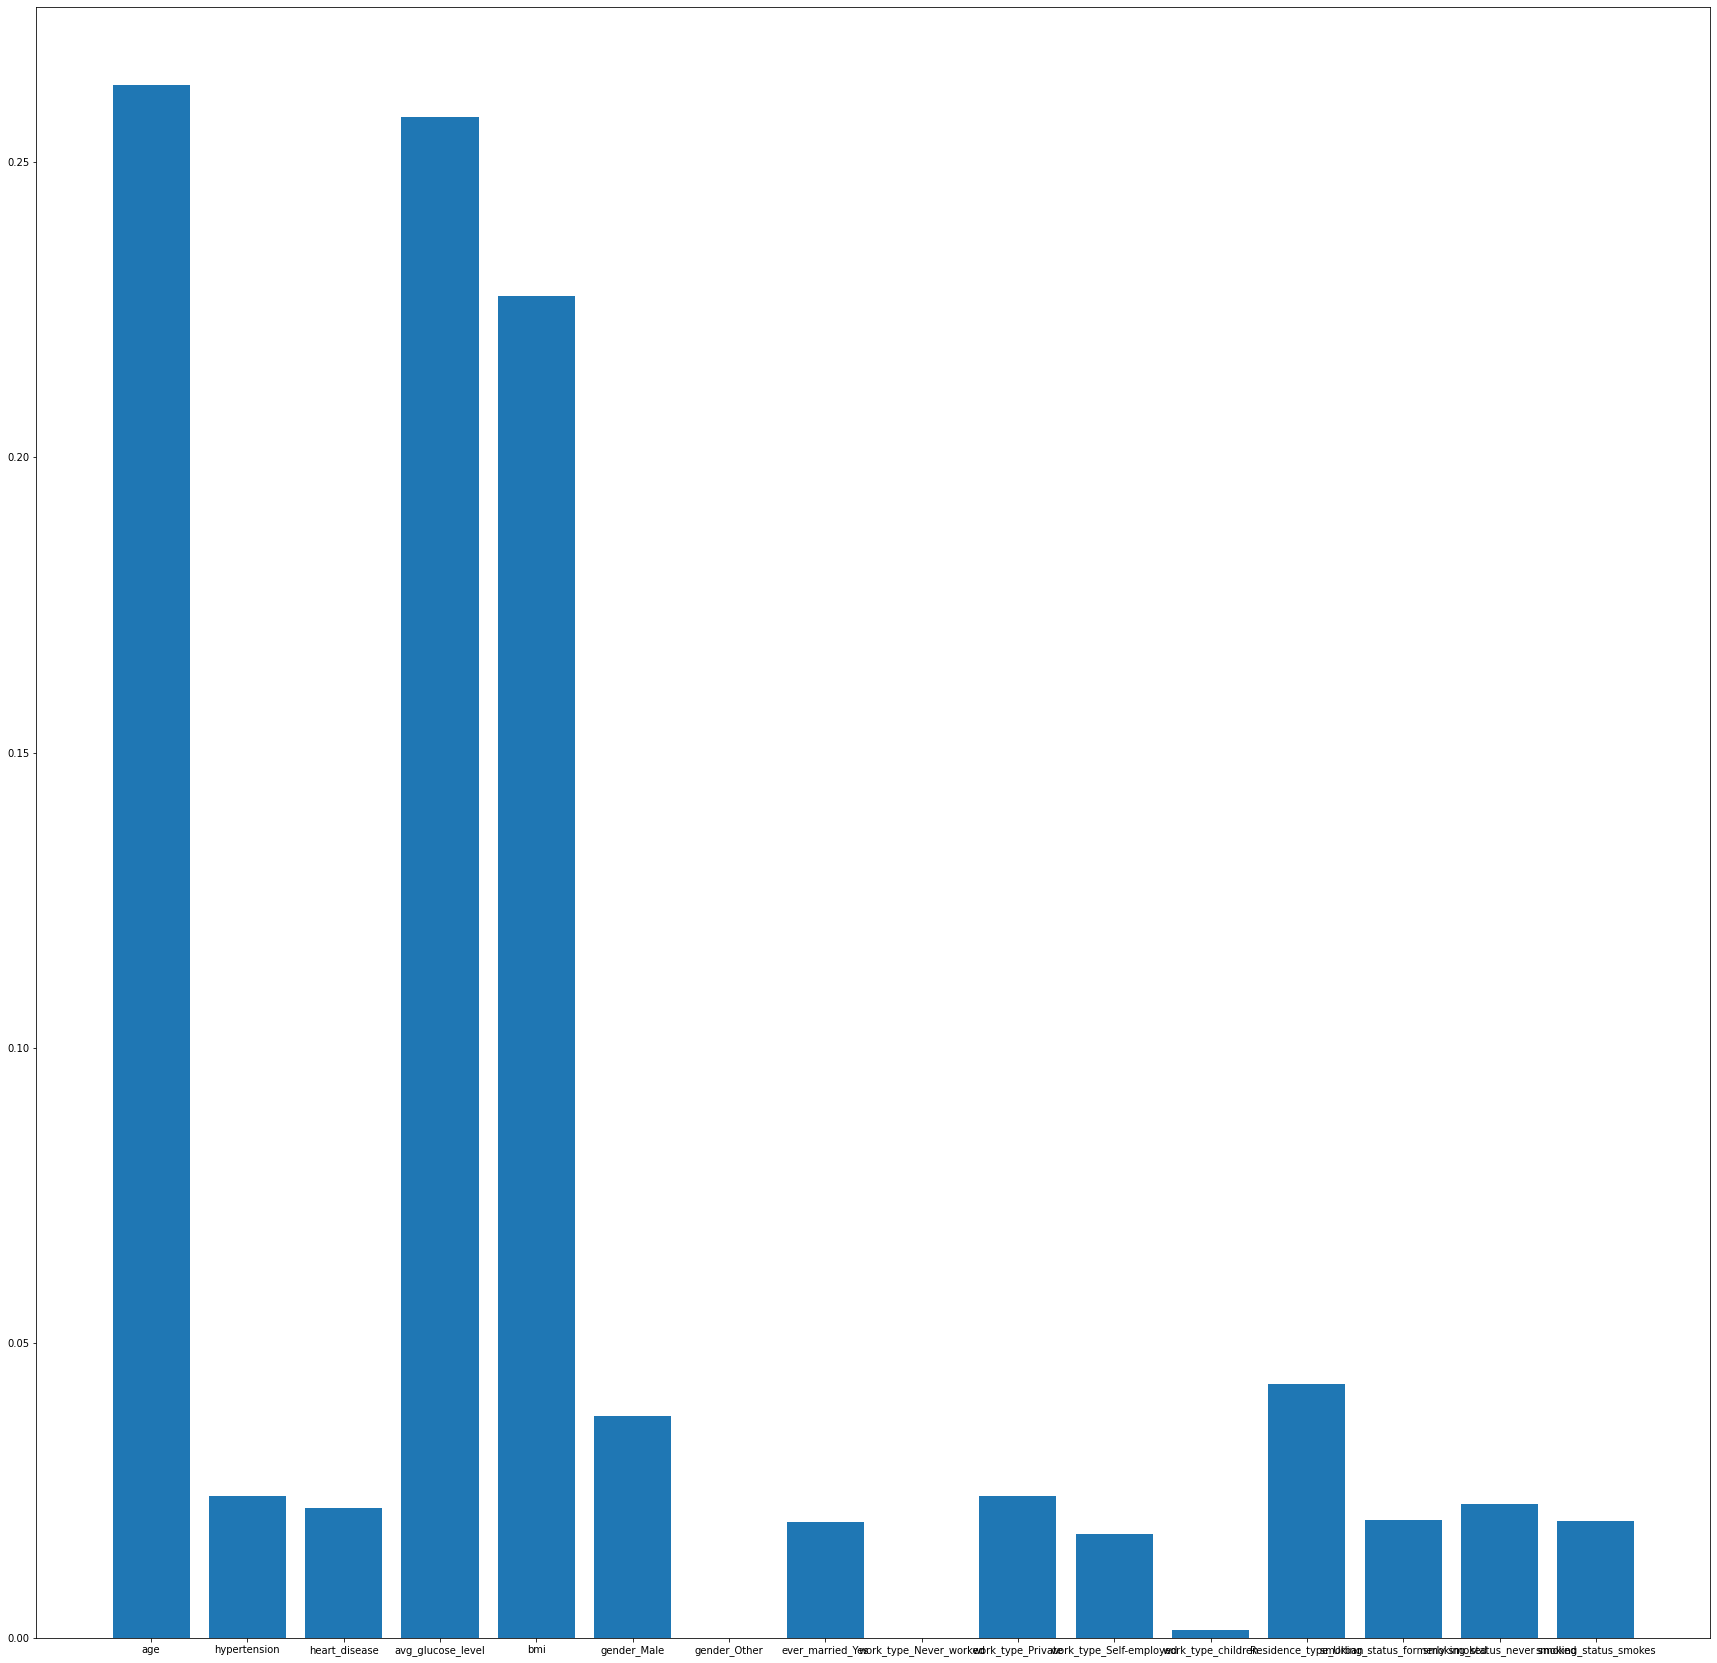

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize= (30,30))
plt.bar(x.columns,model.feature_importances_)

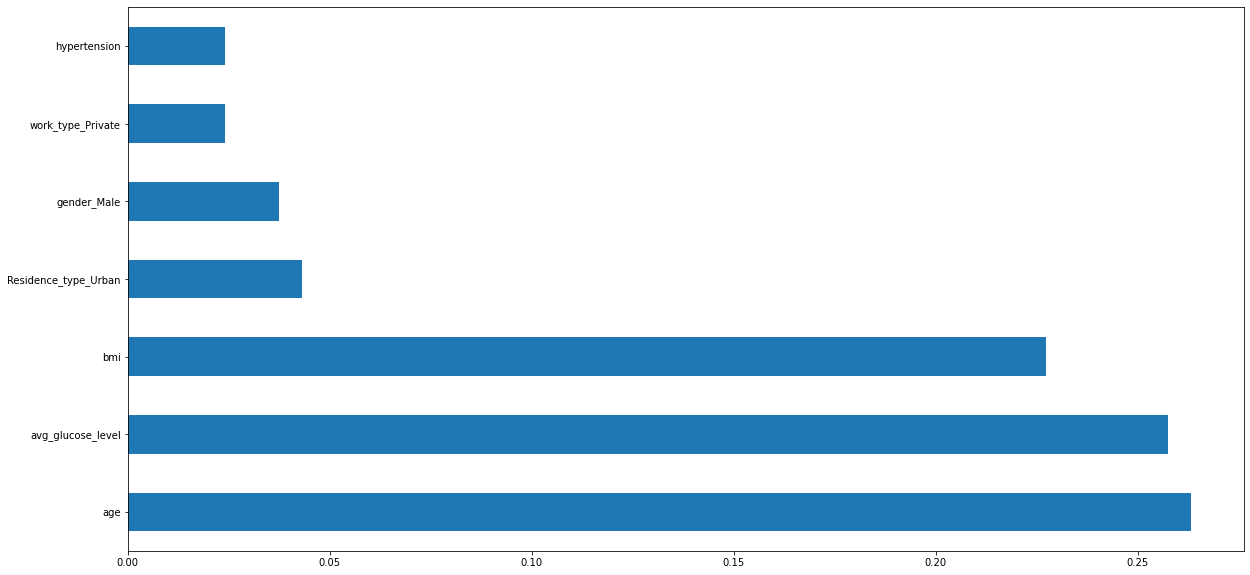

In [26]:
ranked_features=pd.Series(model.feature_importances_,index=x.columns)
plt.figure(figsize= (20,10))
ranked_features.nlargest(7).plot(kind='barh')
plt.show()

# **Model selections and hyperpameterisation for classification models**

# **Logistic regression**

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler as sc
lr = LogisticRegression()
x= df1.drop("stroke" ,axis=1)
y = df1["stroke"]
X_train,X_test,Y_train,Y_test = tts(x,y,test_size=0.30, random_state =100)
scal = sc()
X_train = scal.fit_transform(X_train)
X_test = scal.fit_transform(X_test)
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [32]:
lr.score(X_test,Y_test)

0.9549902152641878

In [33]:
#cross val score
from sklearn.model_selection import cross_val_score as cvs
score = cvs(lr,x,y,cv=10)
print(score)
print(score.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.95107632 0.95107632 0.95107632 0.95107632 0.95107632 0.95107632
 0.95107632 0.95107632 0.95107632 0.95303327]
0.9512720156555773


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [34]:
from sklearn import metrics
confusion2 = metrics.confusion_matrix(Y_test,Y_pred)
confusion12 = metrics.classification_report(Y_test,Y_pred)
print(confusion2)
print(confusion12)

[[1464    0]
 [  69    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1464
           1       0.00      0.00      0.00        69

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Random forest classifier**

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc =  RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
rfc.fit(X_train,Y_train)
Y_rfpred = rfc.predict(X_test)
print(Y_rfpred)
print(rfc.score(X_test,Y_test))

[0 0 0 ... 0 0 0]
0.9549902152641878


In [36]:
#cross val score
from sklearn.model_selection import cross_val_score as cvs
score = cvs(rfc,x,y,cv=10)
print(score)
print(score.mean())

[0.94911937 0.94911937 0.95107632 0.95303327 0.94520548 0.95107632
 0.95107632 0.94911937 0.95107632 0.94911937]
0.9499021526418787


In [37]:
from sklearn import metrics
confusion = metrics.confusion_matrix(Y_test,Y_rfpred)
confusion1 = metrics.classification_report(Y_test,Y_rfpred)
print(confusion)
print(confusion1)

[[1464    0]
 [  69    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1464
           1       0.00      0.00      0.00        69

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
from sklearn.model_selection import RandomizedSearchCV
rfc1 =  RandomForestClassifier()
lr = { 'n_estimators':[100,150,200,250,300,350,400,450,500],
    'criterion':['gini','entropy'],
    'max_depth': [0,1,2,3,4,5,6,7,8,9,10],
    'min_samples_split':[0,1,2,4,6,8,10,12,14,16],
    'min_samples_leaf':[0,1,3,5,7,9,11,13]}
random = RandomizedSearchCV(estimator =rfc1 ,param_distributions=lr , scoring = 'accuracy', cv =10 , n_iter = 10, verbose =2)
random.fit(X_train,Y_train)
print(random.best_estimator_)
print(random.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=14, n_estimators=350; total time=   3.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=14, n_estimators=350; total time=   1.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=14, n_estimators=350; total time=   0.7s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=14, n_estimators=350; total time=   0.7s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=14, n_estimators=350; total time=   0.7s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=14, n_estimators=350; total time=   0.6s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=14, n_estimators=350; total time=   0.7s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=14, n_estimators=350; total time=   0.7s
[

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

RandomForestClassifier(max_depth=1, min_samples_split=14, n_estimators=350)
{'n_estimators': 350, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_depth': 1, 'criterion': 'gini'}


In [39]:
random.best_score_

0.9496784188535748

# **Adaptive boost and its hyperparameter optimisation**

In [40]:
from sklearn.ensemble import AdaBoostClassifier
ada =  AdaBoostClassifier()

In [41]:
lr1 = { 'n_estimators':[0,100,150,200,250,300],
    'learning_rate':[0.1,0.3,0.5,0.7,0.9,1.0],
    'algorithm':['SAMME.R']}
random1 = RandomizedSearchCV(estimator =ada ,param_distributions=lr1 , scoring = 'accuracy', cv =10 , n_iter = 10, verbose =2)
random1.fit(X_train,Y_train)
print(random1.best_estimator_)
print(random1.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=250; total time=   2.4s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=250; total time=   2.8s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=250; total time=   1.5s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=250; total time=   1.0s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=250; total time=   1.0s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=250; total time=   1.0s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=250; total time=   1.0s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=250; total time=   1.0s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=250; total time=   1.0s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=250; total time=   0.9s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=100; total time=   0.4s
[CV] END algo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_weight_boosting.py", line 486, in fit
    return super().fit(X, y, sample_weight)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_weight_boosting.py", line 132, in fit
    self._validate_estimator()
  File "/usr/local/lib/python3.7/dis

AdaBoostClassifier(learning_rate=0.3, n_estimators=250)
{'n_estimators': 250, 'learning_rate': 0.3, 'algorithm': 'SAMME.R'}


In [42]:
random1.best_score_

0.9493990892446365